# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.207837e+01     7.212198e+00
 * time: 0.004065036773681641
     1     2.957521e+01     4.755831e+00
 * time: 0.011881828308105469
     2     2.448040e+01     7.709709e+00
 * time: 0.03052687644958496
     3     1.547782e+01     2.601346e+00
 * time: 0.05289101600646973
     4     1.199262e+01     1.127337e+00
 * time: 0.07156801223754883
     5     1.179866e+01     1.897372e+00
 * time: 0.08627796173095703
     6     1.043188e+01     1.049375e+00
 * time: 0.10135293006896973
     7     1.007267e+01     1.024686e+00
 * time: 0.11612892150878906
     8     9.885259e+00     1.019602e+00
 * time: 0.13125085830688477
     9     9.596243e+00     7.192165e-01
 * time: 0.1463780403137207
    10     9.492501e+00     1.218925e+00
 * time: 0.15747499465942383
    11     9.427858e+00     1.142807e+00
 * time: 0.16895198822021484
    12     9.344314e+00     8.574504e-01
 * time: 0.183912992477417
    13     9.216367e+00     5.836702e-01
 * time: 

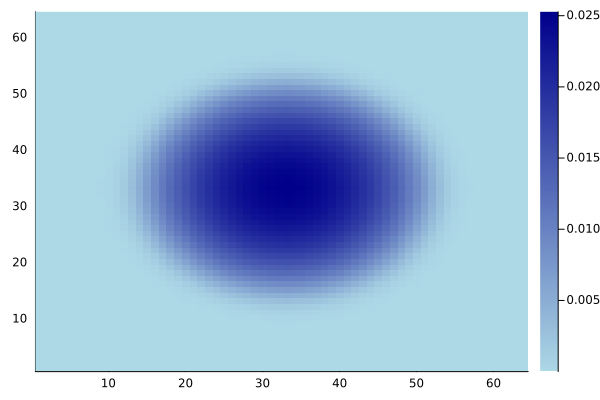

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)